# Policy Gradient Methods

## CSCI E-82A

## Stephen Elston

## Introduction to Policy Gradients

In the previous lesson we created parameterized state value and action value functions:

$$V(s_t) \approx  V(s_t,\mathbf{w}_t) \\
Q(s_t,a_t) \approx Q(s_t,a_t,\mathbf{w}_t)$$

Where, $\mathbf{w}$ is the parameter vector. Using these parameterized functions optimal policies are computed. 

Now, we will consider **parameterized policy functions** which can be written in the form:   

$$\pi(a\ |\ s, \mathbf{\theta}) = Pr\{A_t = a\ |\ S_t = s, \mathbf{\theta_t} = \mathbf{\theta} \}$$   

Where, $\mathbf{\theta} \in R^d$ is the d-dimensional **parameter vector**. The parameterized policy is often referred to as the **actor**.   

A **parameterized value function**, $\hat{v}(s, \mathbf{w})$, can be used to evaluate a policy. The value function is determined by state, s, and the d-dimensional parameter vector $\mathbf{w} \in R^d$. The parameterized value function is often referred to as the **critic**.  


**Actor-critic** algorithms use gradient methods to learn both the policy parameters and the value function or critic. This method leads to the name **policy gradient methods**.      

### Parameterized Policy Approximation

How can we parameterize a policy?   

First, the parameterized policy must be **differentiable** with respect to to the parameter vector, $\mathbf{\theta}$, to be amenable to gradient ascent methods. To be learnable the policy gradient with respect to $\mathbf{\theta} \in R^d$, $\nabla_{\mathbf{\theta}} \pi(a\ |\ s, \mathbf{\theta})$, must exist and be bounded for all states, $s \in \mathcal{S}$, and all actions from these states, $a \in \mathcal{A}(s)$.  

Second, the policy must never become deterministic. In other words, the probability of taking an action must not be simply binary, $\{ 0,1 \}$, or $\pi(a\ |\ s, \mathbf{\theta}) \in \{ 0,1 \}$. Instead, a viable policy must allow each possible action with some probability for all states,  $0 \gt \pi(a\ |\ s, \mathbf{\theta}) \gt 1.0,\ \forall\ a,\ \forall\ s$   

### Advantages of parameterized policy 

You may be wondering what the advantages and disadvantages of parameterized policy might be? The advantages can be summarized as:

- **Improved convergence properties**. In some cases, learning a parameterized policy can be more **sample efficient** than other RL learning methods. Sample efficiency means making good use of the data samples to improve a policy.   
- **Scalable to high dimensional and continuous action spaces**. We have investigated methods to learn policy for continuous state spaces. But, the examples we have examined to now have discrete action spaces. However, many real-world problems have continuous action spaces. Parameterized policy methods work well with continuous action spaces. 
- **Can learn a stochastic policies**. All of the algorithms we have examined until now create deterministic policies. Whereas, parameterized policy can be stochastic.   

The disadvantages of a parameterized policy include:

- These algorithms will **often converge to a locally optimal solution**, rather than a globally optimal solutions.
- The estimation of policy gradient can have high variance. We will examine methods to reduce this variance. 
- Policy evaluation is relatively inefficient and has high variance. We will examine methods to reduce the variance shortly. 

## Policy optimization   

Learning with parameterized policy involves maximizing the value of the policy. A number of optimization methods have been used for this problem. Here, we will use **gradient ascent** to maximize policy value.      

The goal of policy gradient methods is to learn a parameter vector, $\mathbf{\theta}$, which **maximizes policy value**, $J(\mathbf{\theta})$. The commonly used learning method is to apply **gradient ascent** method of the form:  

$$\mathbf{\theta}_{t+_1} = \mathbf{\theta}_t + \alpha \widehat{\nabla J(\mathbf{\theta})}$$  

Where,

$\alpha = $ the learning rate.  
$\widehat{\nabla J(\mathbf{\theta})} \in R^d = $ the **estimate** of the d-dimension **gradient** vector of the loss function:

$$\widehat{\nabla_{\theta} J(\mathbf{\theta})} = 
\begin{bmatrix} 
\frac{\partial J(\mathbf{\theta})}{\partial \theta_1} \\
\frac{\partial J(\mathbf{\theta})}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\mathbf{\theta})}{\partial \theta_d}
\end{bmatrix}$$


## Policy Gradient Theorem  

We can find the **policy gradient** analytically, if the parameterized policy, $\pi_{theta}$, is **differentiable and non-zero everywhere**. The gradient is then $\nabla_{\theta} \pi_{\theta}$. But, how can this gradient be found in practice? The answer is to apply the **policy gradient theorem**.   

For an episodic MDP we can define the performance by the loss function:

$$J(\mathbf{\theta}) = v_{\pi_{\mathbf{\theta}}}(s_0)$$  

Where $s_0$ is the starting state of the episode. In this case, there is no discounting, with $\gamma = 1$.

Given the loss function defined above the policy gradient theorem says that the gradient is:

$$\nabla_{\theta} J(\mathbf{\theta}) \propto \sum_s \mu(s) \sum_a q_\pi(s,a) \nabla_\theta \pi(a|S_t,\mathbf{\theta})\\ = \mathbb{E}_{\pi_\theta} \big[ \sum_a q_\pi(s,a) \nabla_\theta \pi(a|S_t,\mathbf{\theta}) \big]$$

### Likelihood ratio and score function

There is an efficient way to find the gradient of the policy $\nabla_\theta \ \pi(a|S_t,\mathbf{\theta})$. Start with the **likelihood ratio**, obtained by multiplying the numerator and denominator by $\pi(a|S_t,\mathbf{\theta})$:

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \pi(a|S_t,\mathbf{\theta}) \frac{ \nabla_\theta \pi(a|S_t,\mathbf{\theta})}{\pi(a|S_t,\mathbf{\theta}))} $$    

Now, use the following identity:

$$\frac{ \nabla_\theta \pi(a|S_t,\mathbf{\theta})}{\pi(a|S_t,\mathbf{\theta}))} = \nabla_\theta log\pi(a|S_t,\mathbf{\theta})$$

Where $\nabla_\theta log\pi(a|S_t,\mathbf{\theta})$ is the **score function**.

Substituting the score function gives: 

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \pi(a|S_t,\mathbf{\theta}) \nabla_\theta log\pi(a|S_t,\mathbf{\theta})  $$



## Stochastic Policies

Algorithms we have examined previously, value iteration and policy iteration, result in **deterministic policies**. A deterministic policy takes a specific optimal action given the state. 

But, what happens if there is uncertainty as to the best action? In this case, a **stochastic policy** is required. As you likely intuit from the term, the action taken by a stochastic policy is probabilistic.     

### Discrete stochastic actions    

The deterministic policies we have examined previously all take discrete actions. A policy with deterministic discrete actions can be represented, $\pi(a|s) \in {0,1}$. In other words, a binary response, given the state, a specific action is either taken or not. 

Alternatively, the actions taken by a stochastic policy are determined probabilistically. If there are a limited number of possible actions, the probability of taking an action can be computed as **softmax action preferences**:

$$\pi(a|s, \mathbf{\theta}) = \frac{e^{h(s,a,\mathbf{\theta})}}{\sum_b e^{h(s,a,\mathbf{\theta})}}$$   

The action preferences with the largest probabilities are the most likely to be taken.    

For the case of policy parameterization using linear function approximation, $\phi(s,a)\ \mathbf{\theta}$:    

$$\pi(a|s, \mathbf{\theta}) \propto  e^{\phi(s,a)^T\ \mathbf{\theta}}$$

Where, $\phi(s,a)$ are the set of basis functions.

The score function then becomes:  

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \phi(s,a) - \mathbb{E}_{\pi_\theta} \big[ \phi(s,\cdot) \big]$$

### Continuous actions and Gaussian distributions   

Many real world problems have continuous action spaces. Parameterized policies are ideal for continuous action spaces. A stochastic policy for a continuous action space can be parameterized using a Gaussian distribution:    

$$a \sim \mathcal{N} \big( \mu(s),\sigma^2 \big)$$  

where, the mean action is parameterized, $u(s) = \pi(s)^T\ \mathbf{\theta}$. It is also possible to parameterize $\sigma^2$.

The score function is then:   

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \frac{\big(a - \mu(s) \big) \pi(s)}{\sigma^2}$$

## Monte Carlo Policy Gradient - Reinforce  

By direct application of the policy gradient theorem the **reinforce algorithm** can be developed. For each episode, the steps of the reinforce algorithm are: 

1. Using Monte Carlo policy evaluation, the state value, $v(s)$, is computed.  
2. Update the policy parameters using the policy gradient theorem:

$$\mathbf{\theta}_{t+1} = \mathbf{\theta}_t + \alpha\ \nabla_\theta log\pi(a|S_t,\mathbf{\mathbf{\theta}})\  v_t(s)$$

Where $\alpha$ is the learning rate.  

While the reinforce algorithm converges, the variance of the Monte Carlo policy gradient can be large. 

## Reducing Variance with a Critic

How can the variance of the policy gradient be reduced? One possibility is to use ]a **critic** to estimate the action-value function:

$$Q_{\pi_{\mathbf{\theta}}}(s,a) \approx Q_{w}(s,a)$$

The ctor-critic algorithm alternates between these steps:
- **Critic** evaluates the current parameterized policy. The critic updates the state-value function parameters, $w$.
- **Actor** determines the policy of actions. The policy parameters, $\theta$, are updated using the using the critic. 

The interaction between the critic and the actor can lead to a significant reduction in variance.

### Actor-Critic with approximate policy gradient

The actor-critic algorithm uses an **approximate policy gradient**.

$$\nabla_{\theta} J(\mathbf{\theta}) \approx \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a) \big]$$  

Which leads to the parameter update:   

$$\Delta \theta = \alpha\ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a)$$

How can the action-value, $Q_w(s,a)$, be estimated? The policy evaluation of $\pi_\theta$, for the parameters $\theta$, is used. We have examine several methods for policy evaluation:   
 
- Monte Carlo policy evaluation.
- Temporal difference (TD) policy evaluation. 
- Least squares fitting of policy evaluation function by least squares. 

### Bias in Actor-Critic methods

Using an approximate policy gradient introduces **bias**, which can lead to poor convergence of the solution. How can one choose a value function approximation which minimizes this bias? There are two criteria which must be met:

First, the value function must be **compatible** with the policy. By this we mean the following relationship should be true:

$$\nabla_w\ Q_w(s,a) = \nabla_\theta\ log\ \pi_\theta(s,a)$$

Second, the value function must have parameters, $\mathbf{w}$ which minimizes the mean squared error:   
$$\epsilon = \mathbb{E}_{\pi_\theta} \big[ \big( Q_{\pi_\theta}(s,a) - Q_w(s,a) \big)^2 \big]$$

The above criteria leads to the following exact policy gradient that meets both:

$$\nabla_{\theta} J(\mathbf{\theta}) = \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a) \big]$$  


## Gradient for Critic

How is the parameter vector, **w**, for the critic updated? As with the policy parameter vector, $\theta$, the critic parameter vector is updated using gradient ascent. 

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \alpha\ \delta_t\  \nabla_w\ Q_w(s,a)$$

where,  
$\delta_t = R_{t+1} + \gamma Q(S_{t+1},a) - Q(S_t,A_t)$ is the TD error,  
$\nabla_w\ Q_w(s,a)$ is the gradient of $Q_w(s,a)$ with respect to **w**.

How can the gradient, $\nabla_w\ Q_w(s,a)$,be computed. A simple case is to represent $Q(s,a)$ using a linear function approximation: 

$$Q_w(s,a) = \phi(s,a)^T \mathbf{w}$$  

Where, $\phi(s,a)$ are the basis functions. 

Since the $Q_w(s,a)$ is linear in **w**:

$$\nabla_w\ Q_w(s,a) = \phi(s,a)$$

## A Computational Example

With the foregoing theory in mind, its time to try a computational example. The goal here is to find a good policy stochastic for the mountain car problem. The stochastic policy will use a Normally distributed action, given state. 

The action from the stochastic policy is computed from a **Normal distribution**. The objective is to learn a policy parameterized by $\theta$, the mean action value. The value of $\theta$ can be positive or negative, and is bounded in the range $\{-1.0, 1.0 \}$. 

In this example, a linear parameterized policy is used. The policy is parameterized using a basis function of a non-overlapping tile grid.   

### Mountain car simulator. 

In previous labs you have used and discussed the mountain car simulator code in the cell below. Execute this code and its test case. 

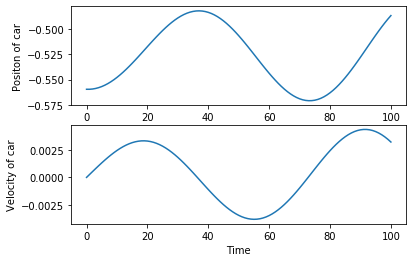

In [89]:
from math import cos, log
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

def sim_car(x, x_dot, acceleration, x_lims = (-1.2,0.5), x_dot_lims = (-0.07,0.07), a_lims = (-1.0,1.0)):
    ## Check the limits on acceleration
    if(acceleration < x_lims[0]): acceleration = -1.0
    if(acceleration > x_lims[1]): acceleration = 1.0
    
    ## Compute velocity within limits
    x_dot_prime = x_dot + 0.001 * acceleration - 0.0025 * cos(3.0 * x)
    if(x_dot_prime < x_dot_lims[0]): x_dot_prime = x_dot_lims[0]
    if(x_dot_prime > x_dot_lims[1]): x_dot_prime = x_dot_lims[1]
        
    ## Now update position
    x_prime = x + x_dot
    if(x_prime < x_lims[0]): x_prime = x_lims[0]
    if(x_prime > x_lims[1]): x_prime = x_lims[1]
      
    ## At the terminal state or not and set reward
    if(x_prime >= x_lims[1]): 
        done = True
        reward = 100.0
    else: 
        done = False
        reward = -1.0
        
    return(x_prime, x_dot_prime, done, reward)    
        
def initalize_car(x_lims = (-0.6,-0.4)):
    ## Find random start for car
    return(nr.uniform(x_lims[0],x_lims[1]))

## Test the function
a = -0.0
x_dot = [0.0]
x = [initalize_car()]
for i in range(100):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
def plot_car(x, x_dot):    
    ## Plot car position
    fig = plt.figure()
    ax1 = fig.add_subplot(211)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(212)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    ax2.set_xlabel('Time')
    
plot_car(x,x_dot)    

### Title basis functions

The policy to be parameterized for this example uses none-overlapping tiles as a basis function. For the two state variables, position and velocity. The tile scheme is a 20x20 grid.   

The code in the cell below contains the coding function for the tile coding along one dimension. 

In [90]:
def x_state(x, x_lims = (-1.2,0.5), n_tiles = 20):
    """Function to compute tile state given positon"""
    state = int((x - x_lims[0])/(x_lims[1] - x_lims[0]) * float(n_tiles))
    if(state > n_tiles - 1): state = n_tiles - 1
    return(state)

for x in list(np.linspace(-1.2,0.5,20)):
    print('x = ' + str(x) + ' state = ' + str(x_state(x)))    

x = -1.2 state = 0
x = -1.1105263157894736 state = 1
x = -1.0210526315789474 state = 2
x = -0.9315789473684211 state = 3
x = -0.8421052631578947 state = 4
x = -0.7526315789473683 state = 5
x = -0.6631578947368421 state = 6
x = -0.5736842105263158 state = 7
x = -0.4842105263157894 state = 8
x = -0.39473684210526305 state = 9
x = -0.3052631578947368 state = 10
x = -0.21578947368421053 state = 11
x = -0.12631578947368416 state = 12
x = -0.03684210526315779 state = 13
x = 0.05263157894736836 state = 14
x = 0.14210526315789473 state = 15
x = 0.2315789473684211 state = 16
x = 0.3210526315789475 state = 17
x = 0.41052631578947385 state = 18
x = 0.5 state = 19


### Policy gradient learning

With the coding for the policy parameters available, it is time to create the code to use policy gradient methods to update these parameters. 

The first step, is to define a function to compute the weight updates of the critic. The critic evaluates the state-values of the policy. The function returns the TD update of the weight. Examine the code in the cell below, and execute it to load this function. 

In [91]:
def compute_Q(x, x_dot, w):
    '''Function to compute action value, Q, given state and parameter vector w'''
    return w[0, x_state(x), x_state(x_dot, x_lims = (-0.07,0.07))] * x + w[1, x_state(x), x_state(x_dot, x_lims = (-0.07,0.07))] * x_dot

The policy parameter or mean action, $\theta$, is updated following the policy gradient theorem. The function in the cell below computes the value of $\nabla_\theta\ log\ \pi_\theta(s,a)$. 

Since the policy parameter, $\theta$, can be positive or negative an offset is added (given the sign) the update. The offset allows the log to be computed for negative values of the policy gradient. 

Examine this code and execute it, to load the function. 

In [92]:
def delta_log_pi(a, x, x_dot, theta, sigma, val_lims = (-1.0,1.0)):
    '''This function computes the gradients of the log probability
    for the policy given the state and action. The function assumes
    a stochastic Gaussina distributed action space'''
    delta_pi = (a - theta[x_state(x), x_state(x_dot, x_lims = (-0.07,0.07))])/sigma
    delta_pi = delta_pi - val_lims[0]  # Add and offset
    ## Take the log
    if(delta_pi > 0.0): delta_pi = log(delta_pi)
    else: delta_pi = 0.0
    return delta_pi 

### Exercise 1: compute the policy parameter update

With a function available to compute $\nabla_\theta\ log\ \pi_\theta(s,a)$, the parameter update can now be computed. The function in the cell below uses the `delta_log_pi` function to update the policy parameter by applying the policy gradient theorem. 

The code to compute the parameter update is missing from the function. Add the missing code and execute it, to load your completed function.  

In [93]:
def delta_theta(theta, w, x, x_dot, a, sigma):
    '''This function updates the policy parameter, theta for the state and action 
    specified and returns delta theta'''
    Q = compute_Q(x, x_dot, w)
    delta_pi = delta_log_pi(a, x, x_dot, theta, sigma)
    ##### ADD THE MISSING CODE BELOW SO RETURN THE UPDATE THE POLICY PARAMETER. ###########
    return delta_pi * Q

The code in the cell below defines a function to compute the next stochastic action, given the state and the policy parameters. There are two steps:

1. The action is drawn from a Normal distribution. 
2. The state is updated, the reward found and the done flag set, based on the stochastic action. 

Examine this code and execute it to load the function.

In [94]:
def next_action(x, x_dot, sigma, theta): 
    '''Function computes a next action, state, reward, and done flag given a state'''
    ## Find the action and the next state, done flag and reward
    a = nr.normal(loc=theta[x_state(x), x_state(x_dot, x_lims = (-0.07,0.07))], scale=sigma, size=1)
    x_prime, x_dot_prime, done, reward = sim_car(x, x_dot, a)
    return a, x_prime, x_dot_prime, reward, done

### Exercise 2: Parameter updating

Finally, everything is in place for the main actor-critic learning function. The steps executed are as follows:

1. The weight and the policy parameter arrays are initialized. 
2. An outer loop is executed for the number of episodes specified. 
3. The initial conditions for each episode are set.
4. The inner loop executes until the car arrives at the terminal state with the following steps: 
  - The next state, action, reward and done flag are found.
  - The TD error is computed and the critic weights are updated.
  - The actor (policy) parameter is updated using the critic.
  - Limits are imposed on the policy parameter.
  - State variables are updated for the next time step. 

The code for the policy parameter update is missing. Complete and execute this code and examine the results. Expect the execution to take some time. 

In [95]:
def tile_AC(episodes = 2000, gamma = 0.9, alpha = 0.02, sigma = 1.0, beta = 0.02, 
            x_dot_knot = 0.0, theta_lims = (-1.0,1.0)):
    
    ## Initialize the parameter arrays for w, and theta
    ## indexed by position, velocity
    w = np.zeros((2,20,20))
    theta = np.zeros((20,20))

    I = 1.0
    
    ## Loop over the episodes
    for _ in range(episodes):
        ## Initialize the car state
        x_dot = [x_dot_knot]
        x = [initalize_car()]

        ## Get next state, action reward, etc. for the car.
        a, x_prime, x_dot_prime, reward, done = next_action(x[0], x_dot[0], sigma, theta)
        x.append(x_prime)
        x_dot.append(x_dot_prime)
        
        i = 1
        while(not done):
            ## find the next action and state
            a_prime, x_prime, x_dot_prime, reward_prime, done_prime = next_action(x[i], x_dot[i], sigma, theta)
            x.append(x_prime)
            x_dot.append(x_dot_prime)
            
            ## Compute the TD error and update the critic
            delta = reward + gamma * compute_Q(x[i], x_dot[i], w) - compute_Q(x[i-1], x_dot[i-1], w)
            d_w = np.multiply(beta * delta, np.array([x[i-1],x_dot[i-1]])).reshape((1,2)) 
            w[:, x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))] = np.add(w[:, x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))], d_w)
            
            ## Update the policy parameter theta of the actor
            d_theta = delta_theta(theta, w, x[i-1], x_dot[i-1], a, sigma)
            ###### THE CODE TO COMPUTE THE UPDATED POLICY PARAMETER VALUE theta_temp ##########
            ###### USING THE VALUE OF d_theta MUST BE ADDED BELOW ##########
            theta_temp =  theta[x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))] + alpha * d_theta
            
            ## Enforce the limits on the paramter
            if(theta_temp > theta_lims[1]): theta[x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))] = theta_lims[1]
            elif(theta_temp < theta_lims[0]): theta[x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))] = theta_lims[0]
            else: theta[x_state(x[i-1]), x_state(x_dot[i-1], x_lims = (-0.07,0.07))] = theta_temp
            
            ## Update the state variables
            a = a_prime
            reward = reward_prime
            done = done_prime
            i = i + 1
            
    ## Return the policy        
    return(theta)
            
stochastic_policy = tile_AC()    

### Testing the stochastic policy

The final task is to test the policy you just created. 

The function in the cell below takes the specified number of time steps for the car following the stochastic policy. The actions are found using the `next_action` function. The time series of state variables actions are returned in lists.  

Execute this code to compute the results.  

In [99]:
def policy_time_step(x_knot, x_dot_knot, policy, steps = 150, sigma = 0.25):
    '''Function uses a stochastic policy to take a time step 
    as predicted by the target model. The function also returns if the episode is done''' 
    x = [x_knot]
    x_dot = [x_dot_knot]
    actions = [0.0]
    done = False
    
    for i in range(steps):
        a, x_prime, x_dot_prime, reward, done = next_action(x[i], x_dot[i], sigma, policy)
        i =+ 1
        x.append(x_prime)
        x_dot.append(x_dot_prime)
        actions.append(a[0])
    return x, x_dot, actions, done

nr.seed(5467)
x_steps, x_dot_steps, action_steps, _ = policy_time_step(-0.01, 0.0, stochastic_policy)

The code in the cell below creates time series plots of the state variables and the actions. In addition, a smoothed plot of the actions is supper imposed on the time series plot of the actions. Execute the code and examine the resulting plots.   

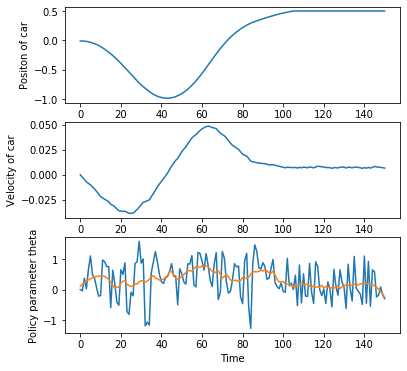

In [100]:
from scipy.signal import savgol_filter

def plot_car_a(x, x_dot, a):    
    ## Plot car position
    fig = plt.figure(figsize = (6,6))
    ax1 = fig.add_subplot(311)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(312)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    
    ## PLot acceleration from policy
    ax3 = fig.add_subplot(313)  
    ax3.plot(a)
    ax3.set_ylabel('Policy parameter theta')
    ax3.set_xlabel('Time')
    
    ## Plot a smoothed policy curve
    x = np.linspace(0, 50, 251)
    smoothed = savgol_filter(a, 25, 3)
    ax3.plot(smoothed)
    
plot_car_a(x_steps, x_dot_steps, action_steps)    

It is also possible to display the tile grid of policy parameters. Execute the code in the cell below display this grid and examine the results. Keep in mind that the axis labels correspond to the indicies of the grid, not physical values.   

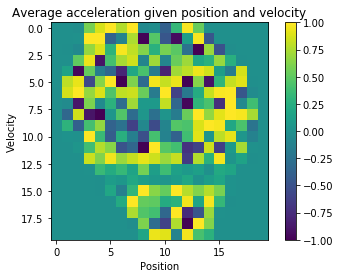

In [102]:
def display_policy(policy):
    plt.imshow(policy)
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Average acceleration given position and velocity')
    plt.colorbar()
    
display_policy(stochastic_policy)   

## Advantage Actor-Critic Methods

As previously mentioned, approximate policy gradients can have high variance. We can now introduce a **baseline function** to find a policy gradient with lower variance. This approach leads to the **advantage actor-critic** method.

### Introduce a baseline

One way to reduce variance is simply to find a formulation with a smaller range of values. As long as the expectation policy gradient is not changed, the algorithm will still converge to the correct solution.These considerations lead to the introduction of a **baseline function**.   

The expectation of the policy gradient with an arbitrary baseline function can be written:  

$$\nabla_{\theta} J(\mathbf{\theta}) \propto \sum_s \mu(s) \sum_a \nabla_\theta \pi(a|S_t,\mathbf{\theta})\ \big( q_\pi(s,a) - b(s) \big)\\ 
= \mathbb{E}_{\pi_\theta} \big[ \sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta})\ \big( q_\pi(s,a) - b(s) \big) \big]$$

Including a baseline function does not change the expectation of the gradient, as can be seen by the following relationship:  

$$\sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta})\ b(s) = b(s) \sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = b(s)\ \nabla_\theta 1 = 0 $$

### The advantage function  

As has been mentioned, the ideal baseline function must not change the expectation of the policy gradient. A good choice of baseline function is the **state-value**, which leads to the **advantage function**:  

$$A_{\pi_\theta}(s,a) = Q_{\pi_\theta}(s,a) - V_{\pi_\theta}(s)$$

The advantage function is the difference between the action-value function and value function. At convergence the difference between state-value and action-value is 0. Thus, variance is minimized. 

The lower variance policy gradient for the advantage function is:  

$$\nabla_{\theta} J(\mathbf{\theta}) = \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ A_{\pi_\theta}(s,a) \big]$$  

The parameter update is then:

$$\Delta \theta = \alpha\ \nabla_\theta\ log\ \pi_\theta(s,a)\ A_{\pi_\theta}(s,a)$$